# 機器學習流程
# 1.讀取資料
# 2.數據清洗
# 3.特徵工程
# 4.相關性分析
# 5.訓練模型

# 1.讀取資料

In [1]:
# 環境準備，使用 Python NumPy、Pandas、seaborn
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
# train資料來源
df_train_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_DigitRecognizer_ANN/main/digit-recognizer/train.csv'

df_train = pd.read_csv(df_train_url)

df_train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2.數據清洗

In [3]:
# 用Pandas中的info()函數，顯示有​​關DataFrame的信息，包括索引的資料類型dtype和列的資料類型dtype，非空值的數量和記憶體使用情況。
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
# 讀取資料、查看空值有哪些
df_train.isna().sum()

# 初步資訊:沒有缺值真棒

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


# 3.特徵工程

In [5]:
# 傳統機器學習：利用特徵工程(feature engineering)，人為對資料進行提煉清洗；
# 深度學習：利用表示學習(representation learning)，機器學習模型本身對資料進行特徵精煉

# 4.相關性分析

In [6]:
# 查看各特徵與標籤的相關性
corrDf = pd.DataFrame()
corrDf = df_train.corr()
corrDf['label'].sort_values(ascending = True)

# 大量的特徵要做相關性分析然後再人工篩選特徵實在太費工，等等直接交給神經網路去做篩選

,label
pixel510,-0.321565
pixel538,-0.319009
pixel567,-0.315471
pixel539,-0.314998
pixel596,-0.314162
...,...
pixel760,NaN
pixel780,NaN
pixel781,NaN
pixel782,NaN


# 5.訓練模型

In [7]:
# 第一行所代表的資料為訓練資料的對應數字，所以要先將其分割出來，並且將訓練資料從 DataFrame 轉為 numpy.Array。
# 從資料中提取X_train(特徵)和y_train(目標)

# 行從0位置開始取值到最後(空白代表到底)，列從1位置開始取值到最後
X_train = df_train.values[0:,1:]

# 行從0位置開始取值到最後(空白代表到底)，列只取第0位置
y_train = df_train.values[0:,0]


# 查看特徵的形狀
X_train.shape

# 可以看到有42000行，每行784列，代表是個28*28的圖(才會等於784)

(42000, 784)

In [8]:
# 查看目標的形狀
y_train.shape

(42000,)

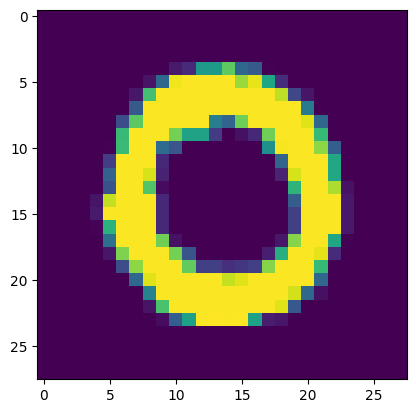

In [9]:
# 印出圖片X_train[1]，也就是第2張圖

import matplotlib.pyplot as plt
# .reshape()是改變數組的方法，用於改變數組的形狀
# 這裡把一維數組的784個，轉換為28*28的二維數組

# 被轉換後:
# X_train[1]為28個有28個數字的陣列
# 1,2,3...28
# 2
# 3
# .
# .
# 28

plt.imshow(X_train[1].reshape((28,28)))

In [10]:
# 用.reshape()改變數組拉成3維
X_train = X_train.reshape((42000,28,28))

X_train.shape

(42000, 28, 28)

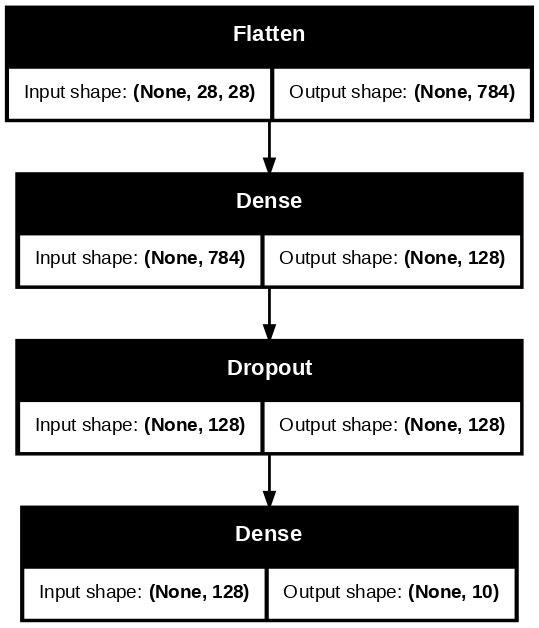

In [11]:
import keras
from keras import layers


# 用Sequential建立模型
ANN = keras.Sequential(name='ClassificationANN')

# input資料
ANN.add(layers.Input(shape=(28, 28))) # 傳入28 x 28個特徵

# 將寬、高各28個像素的圖轉成一維陣列 28 x 28 = 784個特徵
ANN.add(layers.Flatten())

# input為784個特徵，output為128個神經元。
# 用relu來收斂
ANN.add(layers.Dense(128, activation='relu'))

# 在訓練週期隨機丟棄20%的神經元，藉以矯正過度擬合的現象。
# Dropout 是一種對抗過擬合的正則化方法，以一定的機率丟棄隱藏層神經元來對抗過擬合
ANN.add(layers.Dropout(0.2))

# 輸出10個神經元，透過 softmax activation function，轉成機率，即0~9的預測機率，選擇最大機率者為預測值
ANN.add(layers.Dense(10, activation='softmax'))

# 顯示模型圖
keras.utils.plot_model(ANN,show_shapes=True,dpi=100) # show_shapes:是否顯示形狀資訊 dpi:圖示大小


# # 打印出模型的信息
# ANN.summary()

In [12]:
# model每層定義好後需要經過compile
# optimizer(最佳化工具)為adam
# loss(損失函數)為sparse_categorical_crossentropy
# Metrics(評估標準)為accuracy
ANN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



# 訓練網絡用fit
# X_train去跟y_train比，全部資料跑5次
# verbose：日誌顯示，0為不在標準輸出流輸出日誌訊息，1為輸出進度條記錄，2為每個epoch輸出一行記錄
# validation_split：0~1之間的浮點數，用來指定訓練集的一定比例資料作為驗證集。
# 請注意:
# 模型的fit函數有兩個參數，shuffle用於將資料打亂，validation_split用於在沒有提供驗證集的時候，以一定比例從訓練集中取出一部分作為驗證集
# 這裡有個陷阱是，程式是先執行validation_split，再執行shuffle的，所以會出現這種情況：
# 假如你的訓練集是有序的，比方說正樣本在前負樣本在後，又設定了validation_split，那麼你的驗證集中很可能將全部是負樣本
# 同樣的，這個東西不會有任何錯誤報出來，因為Keras不可能知道你的數據有沒有經過shuffle，保險起見如果你的數據是沒shuffle過的，最好手動shuffle一下

history = ANN.fit(X_train, y_train,validation_split=0.25,epochs=5)

Epoch 1/5
985/985 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6786 - loss: 11.2516 - val_accuracy: 0.8217 - val_loss: 0.7160
Epoch 2/5
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7934 - loss: 0.7755 - val_accuracy: 0.8615 - val_loss: 0.5949
Epoch 3/5
985/985 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8480 - loss: 0.5480 - val_accuracy: 0.8883 - val_loss: 0.4347
Epoch 4/5
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8573 - loss: 0.5073 - val_accuracy: 0.9045 - val_loss: 0.4637
Epoch 5/5
985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8779 - loss: 0.4620 - val_accuracy: 0.9175 - val_loss: 0.3293


In [13]:
# History.history 屬性是一個記錄了連續迭代的訓練/驗證（如果存在）損失值和評估值的字典
history.history

{'accuracy': [0.7160634994506836,
  0.8075873255729675,
  0.8505396842956543,
  0.861396849155426,
  0.8782222270965576],
 'loss': [3.720886468887329,
  0.7341268658638,
  0.5622737407684326,
  0.5152041912078857,
  0.46893301606178284],
 'val_accuracy': [0.8217142820358276,
  0.8615238070487976,
  0.8882856965065002,
  0.9044761657714844,
  0.9175238013267517],
 'val_loss': [0.7160418033599854,
  0.594912588596344,
  0.4347078800201416,
  0.46366214752197266,
  0.32931289076805115]}

In [14]:
# evaluate() 用於評估已經過訓練的模型。返回模型的損失值&準確率值
# 損失函數即實際值和預測值的殘差所以越小越好
# 使用 return_dict=True 參數，傳回的結果將是一個字典，其中鍵是名稱，值是對應的數值
# 使用 return_dict=False（預設情況），則傳回一個標量或標量清單(沒有名稱)
ann_evaluate = ANN.evaluate(X_train, y_train, return_dict=True, verbose=2) # verbose = 2 為每個epoch輸出一行記錄

print("Accuracy:", ann_evaluate["accuracy"])
print("Loss:", ann_evaluate["loss"])

1313/1313 - 2s - 2ms/step - accuracy: 0.9269 - loss: 0.2678
Accuracy: 0.9269047379493713
Loss: 0.26779481768608093


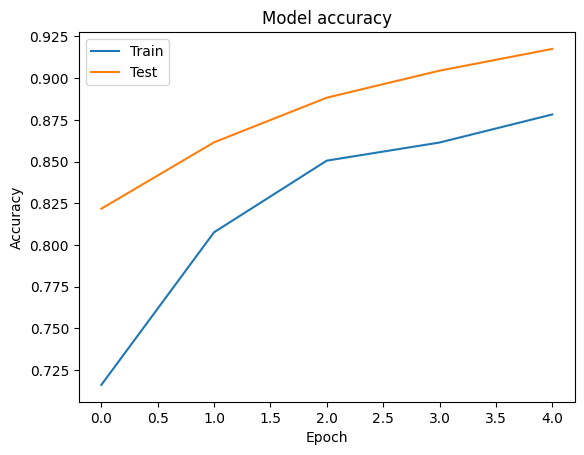

In [15]:
# 繪製訓練 & 驗證的準確率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

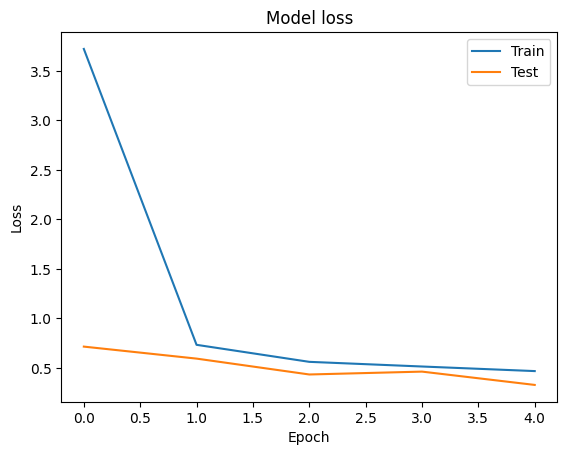

In [16]:
# 繪製訓練 & 驗證的損失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# 1.讀取資料

In [17]:
# test資料來源
df_test_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_DigitRecognizer_ANN/main/digit-recognizer/test.csv'

df_test = pd.read_csv(df_test_url)

df_test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2.數據清洗

In [18]:
# 讀取資料、查看空值有哪些
df_test.isna().sum()

# 初步資訊:沒有缺值真棒

,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


# 3.特徵工程

In [19]:
# 傳統機器學習：利用特徵工程(feature engineering)，人為對資料進行提煉清洗；
# 深度學習：利用表示學習(representation learning)，機器學習模型本身對資料進行特徵精煉

# 4.相關性分析

In [20]:
# 大量的特徵要做相關性分析然後再人工篩選特徵實在太費工，等等直接交給神經網路去做篩選

# 5.訓練模型

In [21]:
# 第一行所代表的資料為測試資料的對應數字，所以要先將其分割出來，並且將測試資料從 DataFrame 轉為 numpy.Array。
# 從資料中提取X_test(特徵)和y_test(目標)

# 行從0位置開始取值到最後(空白代表到底)，列從頭位置開始取值到最後
X_test = df_test.values[0:,:]


# 查看特徵的形狀
X_test.shape

# 可以看到有28000行，每行784列，代表是個28*28的圖(才會等於784)

(28000, 784)

In [22]:
# 用.reshape()改變數組拉成3維
X_test = X_test.reshape((28000,28,28))

X_test.shape

(28000, 28, 28)

In [23]:
# 進行預測

predict = ANN.predict(X_test)
# 抓到X_test的第[]張照片的比對結果，並把結果印出至小數點第3位
print(np.round(predict[0],3))

# 用shape顯示矩陣形狀,可以看到預測結果為28000組答案，每組答案代表一個預測結果，裡面包含各數字的可能性
predict.shape

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


(28000, 10)

In [24]:
# 用np.argmax把[]中的最適結果印出來
predict = np.argmax(predict,axis=1)

print('prelabel:',predict[0])

prelabel: 2


In [25]:
# 用shape顯示矩陣形狀,可以看到預測結果為28000組答案，每組答案代表一個預測結果
predict.shape

(28000,)

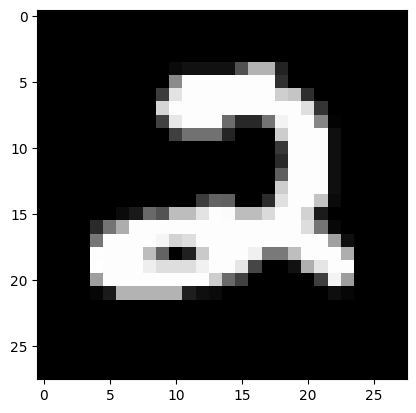

In [26]:
# 以灰階印出[]照片，用來看看訓練結果如何
plt.imshow(X_test[0],cmap='gray')

In [27]:
# 導出預測結果
test_ann_predict = pd.DataFrame()
test_ann_predict['ImageId'] = list(range(1, len(predict) + 1))
test_ann_predict['Label'] = predict

# 顯示預測結果
test_ann_predict

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [28]:
# 將預測結果導出為csv文件
test_ann_predict.to_csv('./DigitRecognizer_ANN.csv',index=False)